## Data Scientist - Capstone - Stock Analysis

### Installed libraries required

pandas, numpy, matplotlib, seaborn, datetime, pandas_datareader,
tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
from IPython.display import display
from multi_plot import multi_plot

# nasdaq listed companies
# resource https://datahub.io/core/nasdaq-listings#resource-nasdaq-listings_zip


In [2]:
## pip install for pandas-datareader
### pip install git+https://github.com/pydata/pandas-datareader.git
# For reading stock data from yahoo
from pandas_datareader.data import DataReader

In [3]:
# read and zip Ticker Symbol and company name into a dictionay
df=pd.read_csv('data/nasdaq-listed_csv.csv',usecols=['Symbol','Company Name'])
tck_dict=dict(zip(df['Symbol'],df['Company Name']))
sym_list=list(df['Symbol'])

In [4]:
#limits on stocks and date
# limit number of stocks
#short_list = sym_list[:5]
#lets look at companies we all will recognize
short_list=['AAPL','TSLA', 'NFLX', 'FB', 'AMZN', 'GOOG']
print('short_list of stocks under review')
display(short_list)
print()
# Use todays date as end and today's date - Year for start
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

short_list of stocks under review


['AAPL', 'TSLA', 'NFLX', 'FB', 'AMZN', 'GOOG']

In [5]:
def multi_plot(df,ylabel,xlabel,hspace,wspace):
    '''
    purpose: will takin pandas dataframe and plot the columns using the index as the x axis
             and the column values as the y axis
    input:   - a data frame with numeric values in columns
             - cmap: dictionary used for small number of graphs
    output:  a dictionary of the containing the column name and a tuple of graph position
                 in a graph matrix (e.g. (0,0) or (1,3))
    '''
    import pandas as pd
    #%matplotlib inline
    import matplotlib.pylab as plt
    from IPython.display import display
    import matplotlib.dates as mdates
################################################################################    
    def map_it(col_list,nrows,ncols):
        '''
        purpose: This function will accept a list of column names and calculate the positioning
                 of each graph in a 2 wide or 3 wide (predetermined) layout
        input:   - a list of column names
                 - cmap: dictionary used for small number of graphs
        output:  a dictionary of the containing the column name and a tuple of graph position
                     in a graph matrix (e.g. (0,0) or (1,3))
        ''' 
        graph_loc={}
        row=0; col=0
        ncols=ncols-1;nrows=nrows-1
        for name in col_list:
            graph_loc[name]=(row,col)
            if col <= ncols-1:
                col=col+1
            else:
                if row < nrows:
                    row=row+1
                    col=0
        return graph_loc 
  ########################################################################  
    def nrow_ncols(col_list, small = {1:[1,1],2:[1,2],3:[2,2],4:[2,2]}):
        '''
        purpose: This function will accept a list of column names and calculate the number
                 of rows and columns needed for a graph matrix. Below 4 graphs it will use a
                 mix of 3 and 4 graphs wide. Over four columns it will us 3 graphs wide.
        input:   - col_list: list of columns to be graphed
                 - cmap: dictionary used for small number of graphs             - 
        output:  the number of rows and the number of columns needed for graphing. 
        call:    nrows,ncols=nrow_ncols(col_list)
        ''' 
        import math   
        len_cols=len(col_list)

        if len_cols in small.keys():
            ncols=small[len_cols][0]
            nrows=small[len_cols][1]
        else:
            nrows=math.ceil(len_cols/3)
            ncols=3
        return(nrows,ncols)
    ############################################################################
    ################ main plot routine #########################################
    
    col_list=list(df.columns)
    nrows,ncols=nrow_ncols(col_list)
    graph_loc=map_it(col_list,nrows,ncols)

    height=nrows*3.5
    fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize= (15,height))
    
    

    fig.subplots_adjust(hspace=hspace)
    fig.subplots_adjust(wspace=wspace)

    for col in col_list:
        # The single row has to handled separately. Matplotlib does not care for [0,n]
        # arrays. it throws an error unless handled as a [n] array
        if nrows==1:
            df[col].plot(ax=axes[graph_loc[col][1]]);
            axes[graph_loc[col][1]].grid()
            axes[graph_loc[col][1]].set_title(col,fontsize=15);
            axes[graph_loc[col][1]].set_xlabel(xlabel,fontsize=20, color='b')
            axes[graph_loc[col][1]].set_ylabel(ylabel,fontsize=20)
            axes[graph_loc[col][1]].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
        else:
            df[col].plot(ax=axes[graph_loc[col][0],graph_loc[col][1]]);
            axes[graph_loc[col][0],graph_loc[col][1]].grid()
            axes[graph_loc[col][0],graph_loc[col][1]].set_title(col,fontsize=15);
            axes[graph_loc[col][0],graph_loc[col][1]].set_xlabel(xlabel,fontsize=20, color='r');
            for tick in axes[graph_loc[col][0],graph_loc[col][1]].get_xticklabels():
                tick.set_rotation(45)
                
            axes[graph_loc[col][0],graph_loc[col][1]].set_ylabel(ylabel,fontsize=20);
            axes[graph_loc[col][0],graph_loc[col][1]].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
            
    plt.show()
    return

In [6]:
#Read selected stock into dataframe
for indx,stock in enumerate(short_list):
    if indx==0:
        try:
            df=DataReader(stock, 'yahoo', start, end)
            df['tckr']=stock
        except KeyError:
            pass
    else:
        try:
            tmp_df=DataReader(stock, 'yahoo', start, end)
        except KeyError:
            pass
        tmp_df['tckr']=stock
        df=pd.concat([df,tmp_df],axis=0)
       

In [7]:
#explore dataset

df = df.dropna(subset=['tckr'])
print ('Shape of DataFrame:')
print (df.shape)
print()

# show tckrs and companies
df['company']=df['tckr'].map(tck_dict)
print('Companies under Review')
tmp_df=df.groupby(['tckr','company']).count()  
display(tmp_df[tmp_df.columns[:-6]])
df=df.drop(columns='company')

#Number of Nans
print()
print ("display number of NaN in columns")
display(df.isnull().sum(axis = 0))
print()

#Head and Tail of Database
print('Head and Tail of Database')
display(pd.concat([df.head(),df.tail()]))

Shape of DataFrame:
(1512, 7)

Companies under Review


,
tckr,company
AAPL,Apple Inc.
AMZN,"Amazon.com, Inc."
FB,"Facebook, Inc."
GOOG,Google Inc.
NFLX,"Netflix, Inc."
TSLA,"Tesla Motors, Inc."



display number of NaN in columns


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
tckr         0
dtype: int64


Head and Tail of Database


,High,Low,Open,Close,Volume,Adj Close,tckr
Date,,,,,,,
2019-11-01,63.982498,62.290001,62.384998,63.955002,151125200.0,63.326683,AAPL
2019-11-04,64.462502,63.845001,64.332497,64.375000,103272000.0,63.742554,AAPL
2019-11-05,64.547501,64.080002,64.262497,64.282501,79897600.0,63.650970,AAPL
2019-11-06,64.372498,63.842499,64.192497,64.309998,75864400.0,63.678192,AAPL
2019-11-07,65.087502,64.527496,64.684998,64.857498,94940400.0,64.413116,AAPL
2020-10-26,1638.239990,1576.500000,1625.010010,1590.449951,1853300.0,1590.449951,GOOG
2020-10-27,1606.844971,1582.780029,1595.670044,1604.260010,1229000.0,1604.260010,GOOG
2020-10-28,1561.349976,1514.619995,1559.739990,1516.619995,1834000.0,1516.619995,GOOG
2020-10-29,1593.709961,1522.239990,1522.359985,1567.239990,2003100.0,1567.239990,GOOG


In [8]:
#summary Stats for one company
print("stats for ",short_list[1])
df[df['tckr']==short_list[1]].describe()


stats for  TSLA


,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,215.927826,203.585746,209.900135,210.089349,6.896674e+07,210.089349
std,132.128429,124.358866,128.638351,128.513600,4.058104e+07,128.513600
min,63.296001,61.852001,62.959999,62.661999,1.232800e+07,62.661999
25%,105.151503,99.544003,102.014002,103.586998,3.972888e+07,103.586998
50%,165.074997,157.205002,162.867996,160.981003,6.312325e+07,160.981003
75%,313.955002,295.026001,303.200500,304.499992,8.834525e+07,304.499992
max,502.489990,470.510010,502.140015,498.320007,3.046940e+08,498.320007


## Stock Analysis at First Glance

### What are the Stock Trends

##### Daily Close Data 


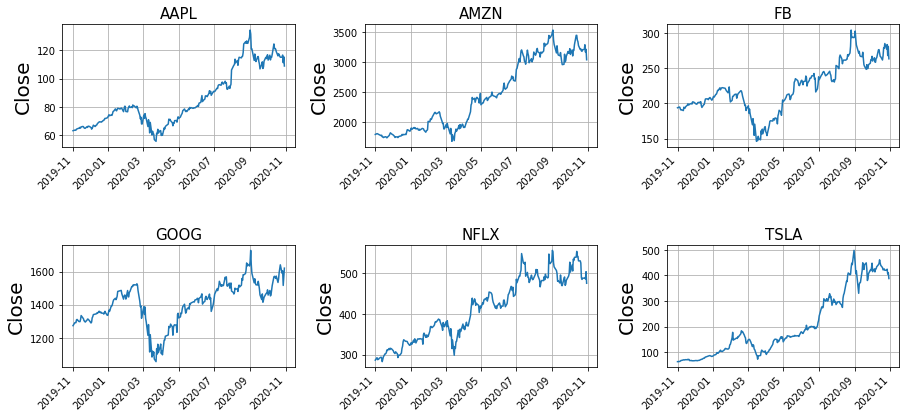

In [9]:
#multi-plot view of close data
#from multi_plot import multi_plot
tmp_df=df[['tckr','Adj Close']].reset_index().pivot(index='Date',columns='tckr',
                                                values='Adj Close').reset_index().set_index('Date')
multi_plot(tmp_df,"Close","", .8,.3)

##### Daily Volumes

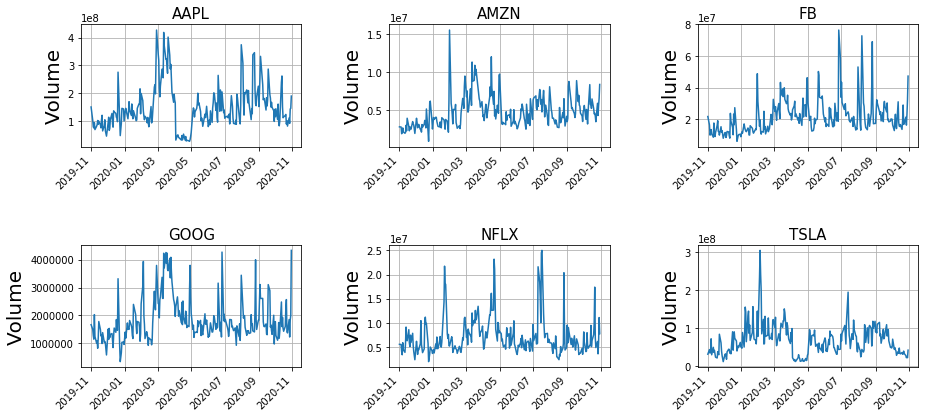

In [10]:
#multi-plot view of Volume data
tmp_df=df[['tckr','Volume']].reset_index().pivot(index='Date',columns='tckr',
                                                    values='Volume').reset_index().set_index('Date')
multi_plot(tmp_df,"Volume","", .8,.4)


#### Moving Average for Trend Analysis

A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations. ... The most common applications of moving averages are to identify trend direction and to determine support and resistance levels. 

Ref#1 How to Use a Moving Average to Buy Stocks by Cory Mitchell
(https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)

Ref#2 Python Pandas || Moving Averages and Rolling Window Statistics for Stock Prices
Mat McCarty (https://www.youtube.com/watch?v=T2mQiesnx8s)

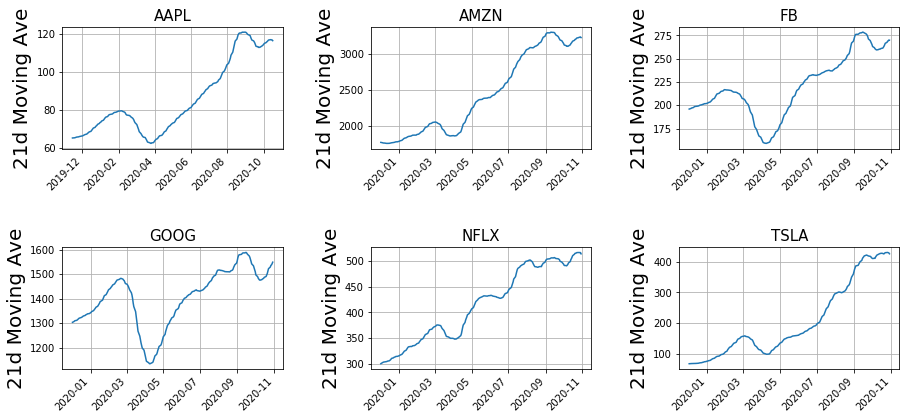

In [11]:
tmp_df=df[['tckr','Adj Close']].reset_index().pivot(index='Date',columns='tckr',
                                               values='Adj Close').reset_index().set_index('Date')
for indx,company in enumerate(tmp_df.columns):
    if indx==0:
        tmp_df2=tmp_df.iloc[:,indx].reset_index().set_index('Date').rolling(21,center=True).mean()
    else:
        tmp_df2=tmp_df2.merge(tmp_df.iloc[:,indx].reset_index().set_index('Date').rolling(21).mean(),on='Date')
multi_plot(tmp_df2,"21d Moving Ave","",.8,.4)  

### How Volatile is the Stock?
#### Measure Daily returns as a percentage

The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value. 
ref: https://pocketsense.com/calculate-daily-stock-return-5138.html

#### Daily Percent Change shown as histograms
ref: Calculating Simple Statistics with Python and Pandas: Stock Market Data
 by Kevin Mooney (https://www.youtube.com/watch?v=oWQfgFZ1oHw)

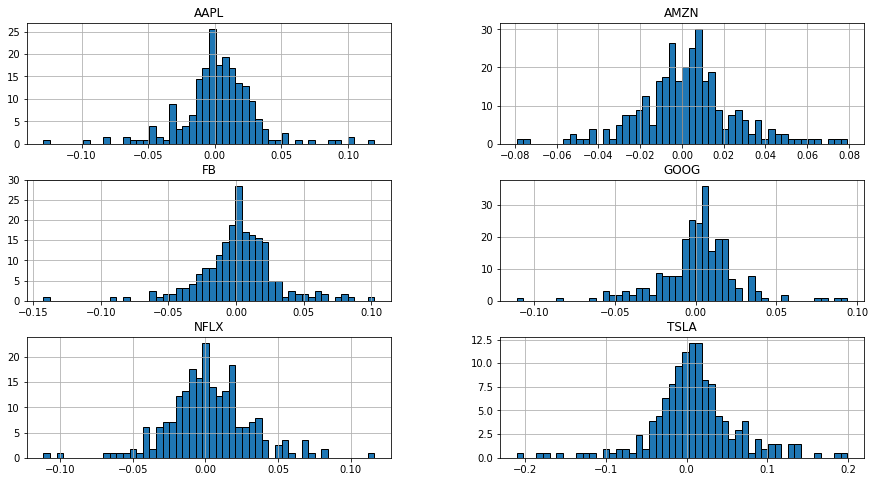

In [12]:

df['pct']=df.groupby('tckr')['Adj Close'].pct_change()
tmp_df=df[['tckr','pct']].reset_index().pivot(index='Date',columns='tckr',
                                                    values='pct').reset_index().set_index('Date')
tmp_df.hist(figsize=(15,8),bins=50, edgecolor='black',
           density=True);

#### Kurtosis
kurtosis is a measure that describes the shape of a distribution's tails in relation to its overall shape. A distribution can be infinitely peaked with low kurtosis, and a distribution can be perfectly flat-topped with infinite kurtosis. Thus, kurtosis measures "tailedness," not "peakedness." This means for our stock analysis that the higher the  number the more likely there will be outliers (volitility in the stock).

In [13]:
#kerosis numbers
kur_d={}
tmp2_df=tmp_df.unstack().reset_index().set_index('Date') \
            .rename(columns={0:'pct'})         
for company in short_list:
    kur_d[company]=tmp2_df[tmp2_df['tckr']==company]['pct'].kurtosis()

pd.DataFrame(kur_d,index=list(kur_d.keys())).reset_index().drop(columns='index').head(1)
    


,AAPL,TSLA,NFLX,FB,AMZN,GOOG
0,4.222599,2.76811,2.185056,4.034104,1.503792,4.066174


### How Closely Corrolated are our plots?
#### Pairwise plots can show at a glance. When two stocks are closely corrolated we can see them group closer to the line.

Although all these stock show high correlation with one another (they are all tech stocks) we can see a higher correlation between Google and Facebook and a lower correlation between Apple and Tesla. 

C:\Users\Jim.000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


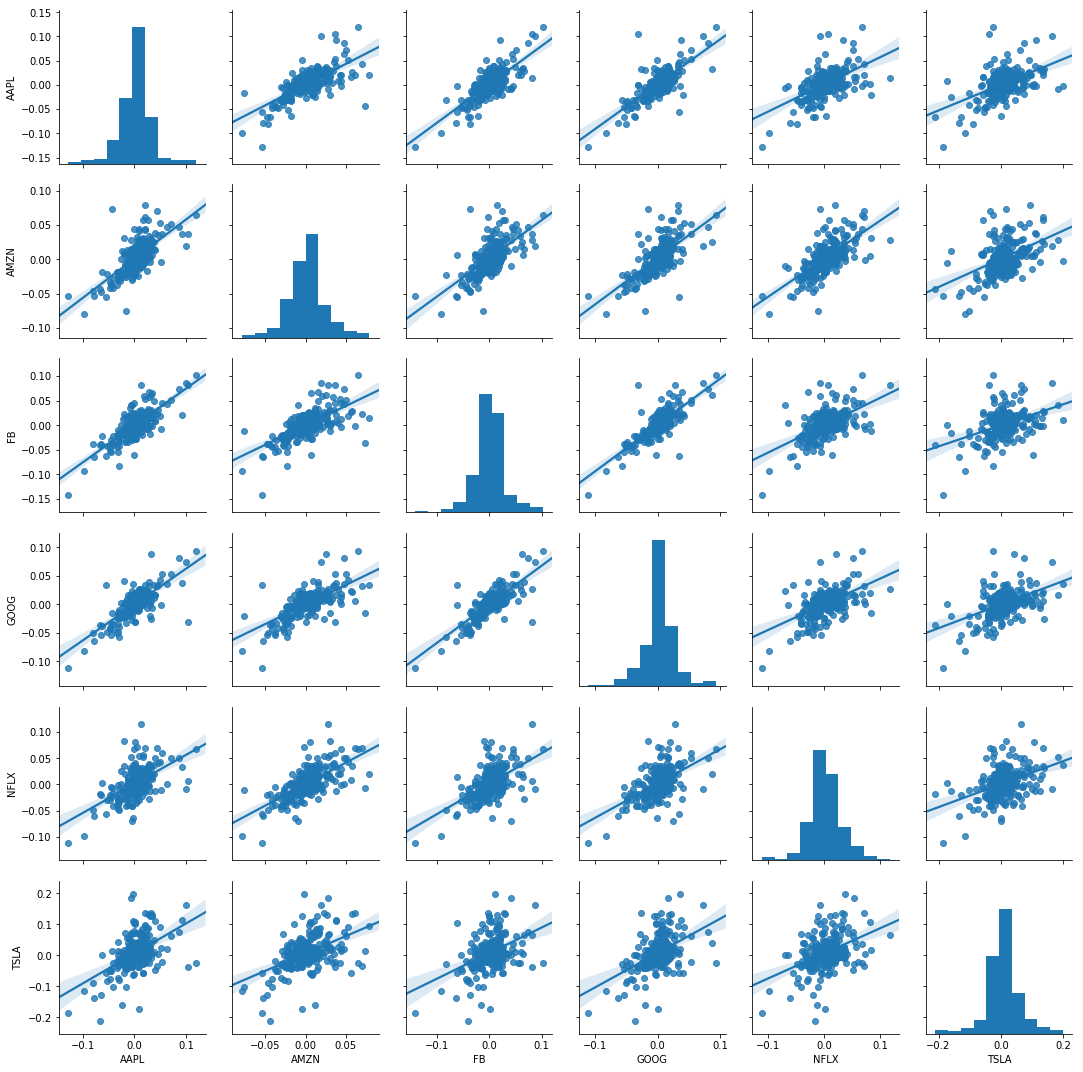

In [14]:
# Pairwise plots to visualize coorelations
cls_pct_change_df=df[['pct','tckr']].reset_index().dropna()
cls_pct_change_df=cls_pct_change_df.pivot_table(index='Date', columns='tckr', values='pct').dropna()
sns.pairplot(cls_pct_change_df,kind='reg');

#### Heat maps are another Good Way to see Correlation
Here we see correlation values between each pair. We can see our earlier observations were borne out.  The correlation between Google and FaceBook is .81, while the correlation between Apple and Tesla is.5.

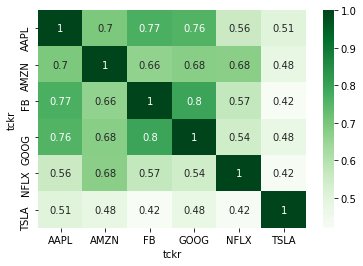

In [15]:
#closing percentage change as a heatmap
cls_pct_change_df
sns.heatmap(cls_pct_change_df.corr(), annot=True,cmap="Greens");

### Predicting the stock price with LSTM

In [16]:
# 1. Get a stock Quote
tsla_df=DataReader('TSLA', data_source='yahoo')
display(pd.concat([tsla_df.head(3),tsla_df.tail(2)]))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-03,42.888000,41.549999,42.770000,41.669998,41662500.0,41.669998
2015-11-04,46.548000,45.040001,45.400002,46.326000,63632000.0,46.326000
2015-11-05,46.916000,45.838001,46.116001,46.354000,22484000.0,46.354000
2020-10-29,418.059998,406.459991,409.959991,410.829987,22655300.0,410.829987
2020-10-30,407.589996,379.109985,406.899994,388.040009,42511300.0,388.040009


**Don't you wish you bought some Tesla stock in 2015?**

Let's take a look at its performance on a graph

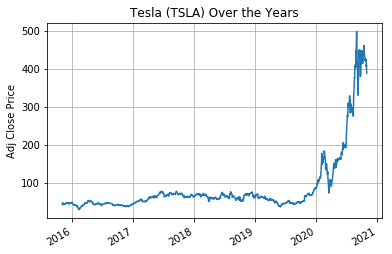

In [17]:
tsla_df['Adj Close'].plot(grid=True,title='Tesla (TSLA) Over the Years');
plt.xlabel('')
plt.ylabel('Adj Close Price')
plt.show();

**See you really wanted to buy in mid 2019**

### Predicting a Stock Price

Lets pick one of the stocks to work with

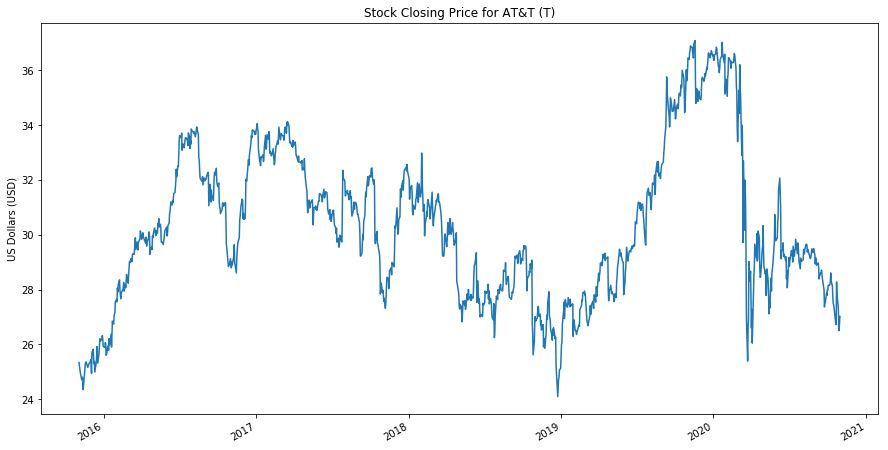

In [18]:
df = DataReader('T', data_source='yahoo')
#df['Adj Close'].plot(figsize=(15,8),
                     #ylabel="Adj Close",legend=True,
                    #title='Stock Closing Price for AT&T (T)');
        
df['Adj Close'].plot(figsize=(15,8),
                    title='Stock Closing Price for AT&T (T)')
plt.ylabel('US Dollars (USD)');
plt.xlabel('');

In [19]:
df1=df.reset_index()['Adj Close']
### 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [20]:
#For time series data we will divide the data for test and train by date.
#We will use a 70/30 split
training_size=int(len(df1)*.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
print ('train_data len:',len(train_data))
print ('test_data len:',len(test_data))

train_data len: 880
test_data len: 378


In [21]:
#create a dataset
#ref: Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning
# https://www.youtube.com/watch?v=H6du_pfuznE  
'''
purpose: This routine will read in the data set and separate the data
         into a series of x values and y values. The Y values will be
         every nth value in the series where n is the time_step. So for
         instance if the time_step is three the first three values are
         given to the x series and the fourth value is assigned to the
         y series. Then process repeats so the values from position 2-4
         are x and the the 4 value is assiged to y.
input:   - the data set (numpy array) and the timestep
output:  The X and Y series as Numpy arrays
'''

def create_dataset(dataset, time_step=1):
    dataX,dataY=[],[]
    for indx in range(len(dataset)-time_step-1):
        a=dataset[indx:(indx+time_step),0]
        dataX.append(a)
        dataY.append(dataset[indx+time_step,0])
    return np.array(dataX),np.array(dataY)



In [22]:
#reshape into X=t,t+1,T+3,t+3 and Y=T+4

In [23]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test =create_dataset(test_data,time_step)


In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(779, 100) (779,)
(277, 100) (277,)


In [25]:
# for LSTM model we have to reshape the data 
#  to be [samples,time steps,features]


X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [26]:
#create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\Jim.000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jim.000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jim.000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jim.000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

In [27]:
%%time
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Wall time: 2.14 s


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
%%time
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,
         batch_size=64,verbose=0)

Instructions for updating:
Use tf.cast instead.
Wall time: 10min 35s


In [30]:
### prediction and check performace metricts

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
#transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29.516134931415355

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

31.014637186539783

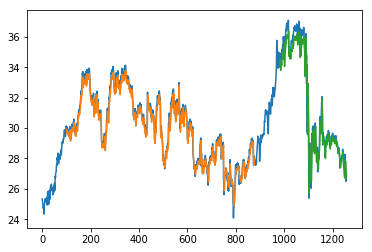

In [34]:
### Plotting
#shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

378

In [36]:
x_input=test_data
#we need previous 100 days for prediction
prev_100=len(test_data)-100
x_input=test_data[prev_100:].reshape(1,-1)
x_input.shape


(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [38]:
#demostrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if len(temp_input)>100:
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.2121409]
101
1 day input [0.41120252 0.41120252 0.43199094 0.39338399 0.40006585 0.39709597
 0.38224717 0.39264145 0.33101846 0.35329181 0.30577537 0.36739822
 0.39115651 0.36665582 0.38001983 0.41045998 0.39783851 0.40823279
 0.37801918 0.42258407 0.39463667 0.40974326 0.41352009 0.44222295
 0.4316482  0.40143473 0.4316482  0.42485014 0.40521127 0.3802851
 0.35913576 0.38934923 0.37952979 0.3802851  0.38104041 0.38406193
 0.41352009 0.40143473 0.40067928 0.4142754  0.42787152 0.42787152
 0.4263609  0.40596672 0.41352009 0.40143473 0.39690274 0.3923706
 0.38783861 0.38934923 0.41503085 0.40521127 0.41200933 0.40521127
 0.41578616 0.39841321 0.37273173 0.39010468 0.38179586 0.36895505
 0.37575311 0.36517836 0.33043276 0.33723082 0.34780556 0.34629494
 0.35535893 0.34251811 0.33194352 0.30928312 0.30021914 0.25187756
 0.26471837 0.26471837 0.2903997  0.28435695 0.30021914 0.29870852
 0.31305995 0.31230464 0.31532587 0.32212393 0.3475086  0.32520092
 0.31058554 0.28135494 0.26135499 0.

9 day output [[0.2157112]]
10 day input [0.35329181 0.30577537 0.36739822 0.39115651 0.36665582 0.38001983
 0.41045998 0.39783851 0.40823279 0.37801918 0.42258407 0.39463667
 0.40974326 0.41352009 0.44222295 0.4316482  0.40143473 0.4316482
 0.42485014 0.40521127 0.3802851  0.35913576 0.38934923 0.37952979
 0.3802851  0.38104041 0.38406193 0.41352009 0.40143473 0.40067928
 0.4142754  0.42787152 0.42787152 0.4263609  0.40596672 0.41352009
 0.40143473 0.39690274 0.3923706  0.38783861 0.38934923 0.41503085
 0.40521127 0.41200933 0.40521127 0.41578616 0.39841321 0.37273173
 0.39010468 0.38179586 0.36895505 0.37575311 0.36517836 0.33043276
 0.33723082 0.34780556 0.34629494 0.35535893 0.34251811 0.33194352
 0.30928312 0.30021914 0.25187756 0.26471837 0.26471837 0.2903997
 0.28435695 0.30021914 0.29870852 0.31305995 0.31230464 0.31532587
 0.32212393 0.3475086  0.32520092 0.31058554 0.28135494 0.26135499
 0.25827816 0.24904736 0.21443203 0.20520138 0.2021244  0.32212408
 0.28673951 0.25289344 0

18 day output [[0.21040319]]
19 day input [0.37801918 0.42258407 0.39463667 0.40974326 0.41352009 0.44222295
 0.4316482  0.40143473 0.4316482  0.42485014 0.40521127 0.3802851
 0.35913576 0.38934923 0.37952979 0.3802851  0.38104041 0.38406193
 0.41352009 0.40143473 0.40067928 0.4142754  0.42787152 0.42787152
 0.4263609  0.40596672 0.41352009 0.40143473 0.39690274 0.3923706
 0.38783861 0.38934923 0.41503085 0.40521127 0.41200933 0.40521127
 0.41578616 0.39841321 0.37273173 0.39010468 0.38179586 0.36895505
 0.37575311 0.36517836 0.33043276 0.33723082 0.34780556 0.34629494
 0.35535893 0.34251811 0.33194352 0.30928312 0.30021914 0.25187756
 0.26471837 0.26471837 0.2903997  0.28435695 0.30021914 0.29870852
 0.31305995 0.31230464 0.31532587 0.32212393 0.3475086  0.32520092
 0.31058554 0.28135494 0.26135499 0.25827816 0.24904736 0.21443203
 0.20520138 0.2021244  0.32212408 0.28673951 0.25289344 0.21750902
 0.18520143 0.20520138 0.22520133 0.2121409  0.21468513 0.21593404
 0.21677911 0.21725257

27 day output [[0.20559022]]
28 day input [0.42485014 0.40521127 0.3802851  0.35913576 0.38934923 0.37952979
 0.3802851  0.38104041 0.38406193 0.41352009 0.40143473 0.40067928
 0.4142754  0.42787152 0.42787152 0.4263609  0.40596672 0.41352009
 0.40143473 0.39690274 0.3923706  0.38783861 0.38934923 0.41503085
 0.40521127 0.41200933 0.40521127 0.41578616 0.39841321 0.37273173
 0.39010468 0.38179586 0.36895505 0.37575311 0.36517836 0.33043276
 0.33723082 0.34780556 0.34629494 0.35535893 0.34251811 0.33194352
 0.30928312 0.30021914 0.25187756 0.26471837 0.26471837 0.2903997
 0.28435695 0.30021914 0.29870852 0.31305995 0.31230464 0.31532587
 0.32212393 0.3475086  0.32520092 0.31058554 0.28135494 0.26135499
 0.25827816 0.24904736 0.21443203 0.20520138 0.2021244  0.32212408
 0.28673951 0.25289344 0.21750902 0.18520143 0.20520138 0.22520133
 0.2121409  0.21468513 0.21593404 0.21677911 0.21725257 0.21737961
 0.21721613 0.21683565 0.21631263 0.21571121 0.21507898 0.21444663
 0.21382983 0.2132330

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
df3=df1.tolist()
df3.extend(lst_output)

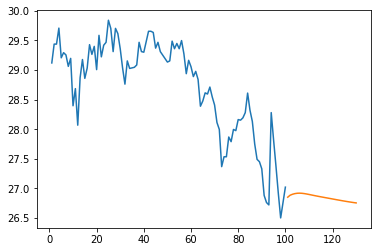

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output));

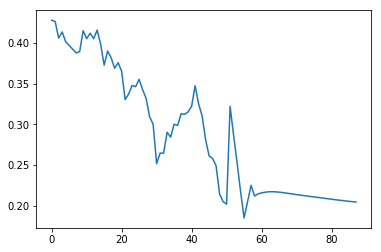

In [42]:
df3=df1.tolist()
df3.extend(lst_output)

plt.plot(df3[1200:])
